In [20]:
import numpy as np
from numba import jit
import pandas as pd

import pints
import pints.plot
import pints_smol_jit as toy
import matplotlib.pyplot as plt



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [21]:

model = toy.SmolModel(None,None)


# true_parameters = [0.0004, 500]


times = np.linspace(37, 145,109)

df = pd.read_csv('s11_inference_input_multi_well_03_16.csv', header=None)
org_values = np.transpose(df.to_numpy())

print(org_values)

print(org_values.shape)


[[52.  66.  40.  ...  0.   0.   0. ]
 [48.5 65.  37.5 ...  0.   0.   0. ]
 [47.5 60.  38.5 ...  0.   0.   0. ]
 ...
 [ 1.   1.5  2.  ...  0.   0.   0. ]
 [ 1.   1.   1.  ...  0.   0.   0. ]
 [ 1.5  1.   1.5 ...  0.   0.   0. ]]
(109, 100)


Add noise to the data (using random sampling from normal distribution)

In [22]:

# noise = 0.25
# values = org_values *(1 + noise * np.random.normal(0, 1, org_values.shape))

# size_noise = 100
# noise_value = 25
# # Create a list with the specified size filled with a placeholder value
# noise_arr = [noise_value for _ in range(size_noise)]


Set-up pints problem and log likelihoods

In [23]:

# problem = pints.MultiOutputProblem(model, times, values)
# times = np.linspace(37, 97,61)
problem = pints.MultiOutputProblem(model, times, org_values)


log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)

print('Original problem dimension: ' + str(problem.n_parameters()))
print('New dimension: ' + str(log_likelihood_2.n_parameters()))

# true_parameters += noise_arr
# print(true_parameters)
print(int(times[0]))



Original problem dimension: 2
New dimension: 2
37


Create uniform log prior

In [24]:

# # Define the size of the list
# size = 102
# placeholder_lower_value = 1
# placeholder_upper_value = 50
 
# # Create a list with the specified size filled with a placeholder value
# prior_arr_lower = [placeholder_lower_value for _ in range(size)]
# prior_arr_upper = [placeholder_upper_value for _ in range(size)]
# prior_arr_lower[0] = 0.0001
# prior_arr_upper[0] = 0.001
# prior_arr_lower[1] = 100
# prior_arr_upper[1] = 1000

log_prior = pints.UniformLogPrior(
    [0.0000000001, 1],
    [1, 10000]
    )
# log_prior = pints.UniformLogPrior(
#     prior_arr_lower,
#     prior_arr_upper
#     )

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_55387/1314634405.py:14: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


In [63]:


xs = [
    np.array([4.2e-07,770]),
    np.array([3.9e-07,780]),
    np.array([3.9e-07,770])
]
# xs.set_max_iterations(9000)
# chains = pints.mcmc_sample(log_posterior, 3, xs)
mcmc = pints.MCMCController(log_posterior, 3, xs)
mcmc.set_max_iterations(200000)
chains = mcmc.run()
print(chains)



Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval.  Accept.   Accept.   Accept.   Time m:s
0     3       0         0         0          0:00.0
1     6       0         0         0          0:00.0
2     9       0         0         0          0:00.0
3     12      0         0         0          0:00.0
20    63      0         0         0          0:00.1
40    123     0         0         0          0:00.1
60    183     0         0         0          0:00.2
80    243     0         0         0          0:00.2
100   303     0         0         0          0:00.2
120   363     0         0         0          0:00.3
140   423     0         0         0          0:00.3
160   483     0         0         0          0:00.4
180   543     0         0         0          0:00.4
Initial phase completed.
200   603     0         0         0          0:00.4
220   663     0         0         0          0:00.5
240   723     0.0083    0.00415   0.00415    0:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pints/_log_likelihoods.py:546: RuntimeWarning: divide by zero encountered in log
  return np.sum(self._constant - self._n_over_2 * np.log(sse))


340   1023    0.0147    0.0147    0.0088     0:00.7
360   1083    0.0139    0.0166    0.00831    0:00.7
380   1143    0.0131    0.0157    0.00787    0:00.7
400   1203    0.0125    0.015     0.00748    0:00.8
420   1263    0.0143    0.0143    0.00713    0:00.8
440   1323    0.0159    0.0159    0.0113     0:00.8
460   1383    0.0152    0.0152    0.0108     0:00.9
480   1443    0.0146    0.0146    0.0104     0:00.9
500   1503    0.016     0.016     0.00998    0:00.9
520   1563    0.0154    0.0154    0.0096     0:01.0
540   1623    0.0148    0.0185    0.00924    0:01.0
560   1683    0.0143    0.0178    0.00891    0:01.0
580   1743    0.0172    0.0172    0.00861    0:01.1
600   1803    0.02      0.0183    0.0116     0:01.1
620   1863    0.0193    0.0177    0.0113     0:01.1
640   1923    0.0187    0.024961  0.014      0:01.2
660   1983    0.0182    0.0242    0.0136     0:01.2
680   2043    0.0176    0.0235    0.0132     0:01.2
700   2103    0.0171    0.0257    0.0128     0:01.3
720   2163  

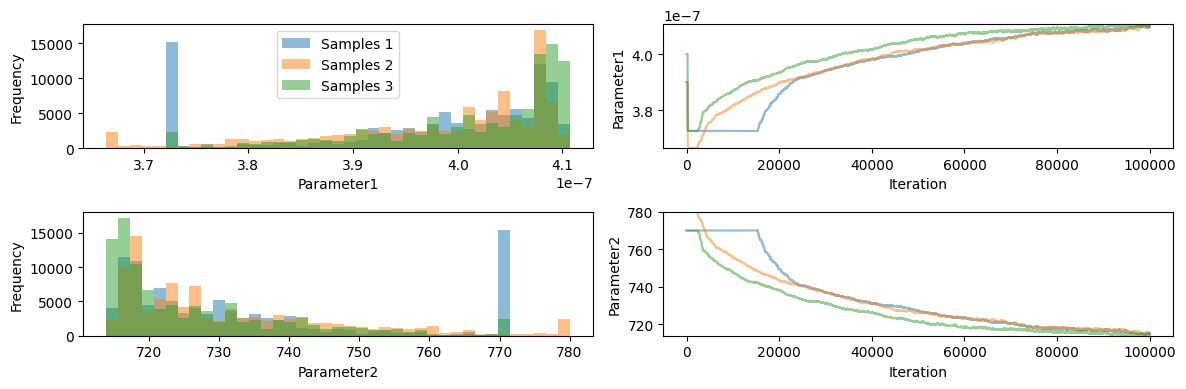

In [64]:

pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()